## Ridge Regression，岭回归

昨天我们讲到了普通最小二乘法的一些缺陷。
首先，最小二乘法需要计算XTX的逆矩阵，有可能它的逆矩阵不存在，这样就没有办法直接用最小二乘法了。
其次，当样本量m很少，小于特征数n的时候，这时拟合方程是欠定的，常用的优化方法都无法去拟合数据。
更进一步来讲，
岭回归通过对系数的大小施加惩罚来解决普通最小二乘法的一些问题。岭系数最小化惩罚残差平方和：
【插入图片】
这里，𝛼 ≥ 0是一个复杂度参数，控制收缩量：a越大，收缩量越大，因此系数对于共线性更加稳健，不那么敏感了。

同其他线性模型一样，Ridge也是对X和y数据进行fit处理，然后保存系数w在coef_成员中：


In [1]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit ([[0, 0], [0, 0], [1, 1]], [0, .1, 1])


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [2]:
reg.coef_

array([ 0.34545455,  0.34545455])

In [3]:
reg.intercept_

0.13636363636363638

## Example：Plot Ridge coefficients as a function of the regularization

本例展示了协线性对于预测器的系数的影响。
岭回归是本例中使用的预测器。每种颜色代表系数向量的不同特征，并作为正则化参数的函数显示。
这个例子也显示了将岭回归应用于高度病态矩阵的有用性。对于这样的矩阵，目标变量的微笑变化会导致计算权重的巨大差异。在这种情况下，设置一定的正则化参数a以减少这种变化或者噪声是有用的。
当a很大时，正则化效应主导着平方损失函数，系数趋于零。当a趋近0时，解趋于普通最小二乘法时，系数呈现大的震荡。在实践中，有必要对a进行调优，以保持两者之间的平衡。


当a很大时，正则化效应主导着平方损失函数，系数趋于零。当a趋近0时，解趋于普通最小二乘法时，系数呈现大的震荡。在实践中，有必要对a进行调优，以保持两者之间的平衡。


In [4]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
print(X)


Automatically created module for IPython interactive environment
[[ 1.          0.5         0.33333333  0.25        0.2         0.16666667
   0.14285714  0.125       0.11111111  0.1       ]
 [ 0.5         0.33333333  0.25        0.2         0.16666667  0.14285714
   0.125       0.11111111  0.1         0.09090909]
 [ 0.33333333  0.25        0.2         0.16666667  0.14285714  0.125
   0.11111111  0.1         0.09090909  0.08333333]
 [ 0.25        0.2         0.16666667  0.14285714  0.125       0.11111111
   0.1         0.09090909  0.08333333  0.07692308]
 [ 0.2         0.16666667  0.14285714  0.125       0.11111111  0.1
   0.09090909  0.08333333  0.07692308  0.07142857]
 [ 0.16666667  0.14285714  0.125       0.11111111  0.1         0.09090909
   0.08333333  0.07692308  0.07142857  0.06666667]
 [ 0.14285714  0.125       0.11111111  0.1         0.09090909  0.08333333
   0.07692308  0.07142857  0.06666667  0.0625    ]
 [ 0.125       0.11111111  0.1         0.09090909  0.08333333  0.0769230

In [5]:
y = np.ones(10)
print(y)


[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [6]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
print(alphas)



[  1.00000000e-10   1.09698580e-10   1.20337784e-10   1.32008840e-10
   1.44811823e-10   1.58856513e-10   1.74263339e-10   1.91164408e-10
   2.09704640e-10   2.30043012e-10   2.52353917e-10   2.76828663e-10
   3.03677112e-10   3.33129479e-10   3.65438307e-10   4.00880633e-10
   4.39760361e-10   4.82410870e-10   5.29197874e-10   5.80522552e-10
   6.36824994e-10   6.98587975e-10   7.66341087e-10   8.40665289e-10
   9.22197882e-10   1.01163798e-09   1.10975250e-09   1.21738273e-09
   1.33545156e-09   1.46497140e-09   1.60705282e-09   1.76291412e-09
   1.93389175e-09   2.12145178e-09   2.32720248e-09   2.55290807e-09
   2.80050389e-09   3.07211300e-09   3.37006433e-09   3.69691271e-09
   4.05546074e-09   4.44878283e-09   4.88025158e-09   5.35356668e-09
   5.87278661e-09   6.44236351e-09   7.06718127e-09   7.75259749e-09
   8.50448934e-09   9.32930403e-09   1.02341140e-08   1.12266777e-08
   1.23155060e-08   1.35099352e-08   1.48202071e-08   1.62575567e-08
   1.78343088e-08   1.95639834e-08

In [9]:
coefs = []
for a in alphas:
	ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
	ridge.fit(X, y)
	coefs.append(ridge.coef_) 


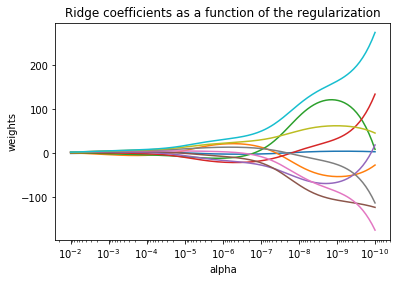

In [10]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


np.logspace()方法
用于创建等比数列，参数中，起始点和结束点表示10的幂。


## Setting the regularization parameter: generalized Cross-Validation

RidgeCV实现了内置交叉验证a参数的岭回归。该对象的工作方式与GridSearchCV相同，只不过它默认为广义交叉验证GCV，这是一种有效的形式：

In [11]:
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])


RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [12]:
reg.alpha_

0.10000000000000001